#Biodata



*   Nama : Rafian Ramadhani
*   Username : Rafian
*   Email : rafianramadhani@gmail.com
*   Pekerjaan : Mahasiswa
*   Link Googlecollab :
https://colab.research.google.com/drive/1L2PyCApUeuF5UHu2P81Ta-c6CV4vw0P-?usp=sharing



#Install Tensorflow dan Panggil Library yang dibutuhkan

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [ ]:
from tensorflow import keras
from keras import layers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Download Data

In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2021-04-07 04:50:39--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  10.6MB/s    in 48s     

2021-04-07 04:51:29 (6.35 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



#Inisiasi Lokasi Data

In [ ]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = 'rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/latianml')
zip_ref.close()

base_dir = '/latianml/rockpaperscissors'

In [ ]:
import shutil
shutil.rmtree(os.path.join(base_dir, 'rps-cv-images'))
os.remove(os.path.join(base_dir, 'README_rpc-cv-images.txt'))

In [ ]:
os.listdir(base_dir)

['scissors', 'paper', 'rock']

#Lakukan Image Generator untuk Persiapan dan Split Data

In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=90,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    validation_split = 0.4)


In [ ]:
train_generator = train_datagen.flow_from_directory(
        base_dir,  # direktori data latih
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical',
        shuffle = True,
        subset='training')

val_generator = train_datagen.flow_from_directory(
        base_dir, # direktori data validasi
        target_size=(150, 150),
        batch_size=32, 
        class_mode='categorical',
        shuffle = True,
        subset='validation')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


#Arsitektur CNN

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

#Compile model dengan 'adam' optimizer loss function Category Crossentropy 

In [ ]:
Cmodel.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#Train Model

In [ ]:
hasil = model.fit(
      train_generator,
      steps_per_epoch=25,
      epochs=25,
      validation_data=val_generator,
      validation_steps=5,
      verbose=2)

Epoch 1/25
25/25 - 47s - loss: 0.0790 - accuracy: 0.9750 - val_loss: 0.1172 - val_accuracy: 0.9688
Epoch 2/25
25/25 - 45s - loss: 0.0971 - accuracy: 0.9675 - val_loss: 0.1557 - val_accuracy: 0.9625
Epoch 3/25
25/25 - 45s - loss: 0.1077 - accuracy: 0.9610 - val_loss: 0.1148 - val_accuracy: 0.9750
Epoch 4/25
25/25 - 45s - loss: 0.0573 - accuracy: 0.9792 - val_loss: 0.0538 - val_accuracy: 0.9812
Epoch 5/25
25/25 - 46s - loss: 0.0607 - accuracy: 0.9787 - val_loss: 0.0671 - val_accuracy: 0.9812
Epoch 6/25
25/25 - 46s - loss: 0.0662 - accuracy: 0.9775 - val_loss: 0.0877 - val_accuracy: 0.9625
Epoch 7/25
25/25 - 46s - loss: 0.0728 - accuracy: 0.9750 - val_loss: 0.1016 - val_accuracy: 0.9688
Epoch 8/25
25/25 - 45s - loss: 0.0562 - accuracy: 0.9792 - val_loss: 0.0493 - val_accuracy: 0.9875
Epoch 9/25
25/25 - 46s - loss: 0.0477 - accuracy: 0.9825 - val_loss: 0.0521 - val_accuracy: 0.9875
Epoch 10/25
25/25 - 46s - loss: 0.0684 - accuracy: 0.9762 - val_loss: 0.1226 - val_accuracy: 0.9500
Epoch 11/

#Test Data (Predict) dengan Upload Data Test

Saving 1lEpWTJDphkm3HdC.png to 1lEpWTJDphkm3HdC.png
Scissor


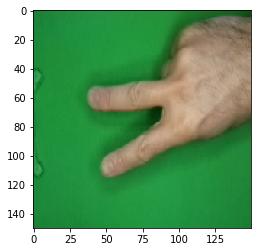

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])

  prob = model.predict(images) 
  classes = prob.argmax(axis=1)
  
  if classes == 0:
    print("Paper")
  elif classes == 1:
    print("Rock")
  elif classes == 2:
    print("Scissor")

#EDA Hasil Prediksi

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

akurasi = hasil.hasil['accuracy']
vallidasi_akurasi = hasil.hasil['val_accuracy']

loss = hasil.hasil['loss']
validasi_loss = hasil.hasil['val_loss']

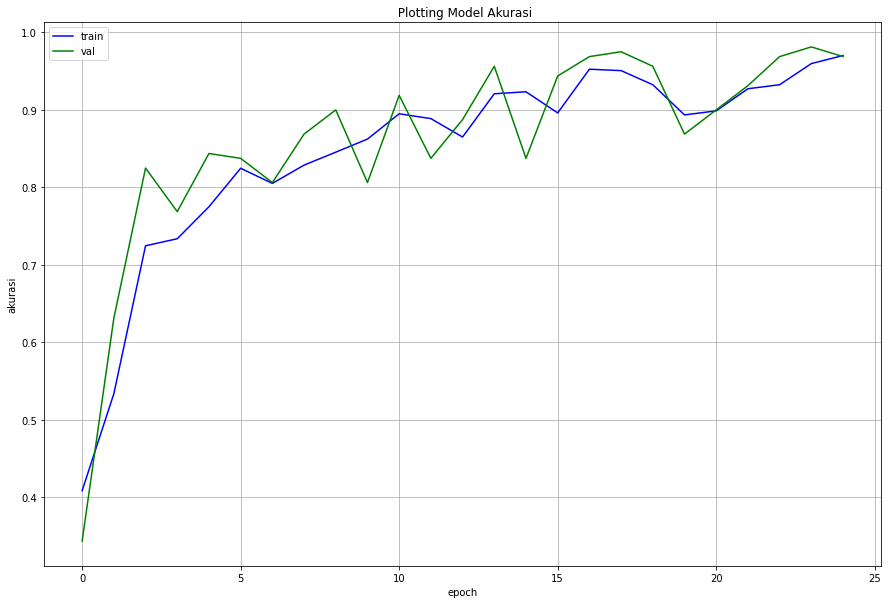

In [ ]:
from matplotlib import rcParams

rcParams['figure.figsize']= 15 , 10
plt.plot(akurasi, color="blue")
plt.plot(vallidasi_akurasi, color ="green")
plt.xlabel("epoch")
plt.ylabel("akurasi")
plt.title(" Plotting Model Akurasi")
plt.legend(['train', 'val'], loc='upper left')
plt.grid(True)

plt.show()

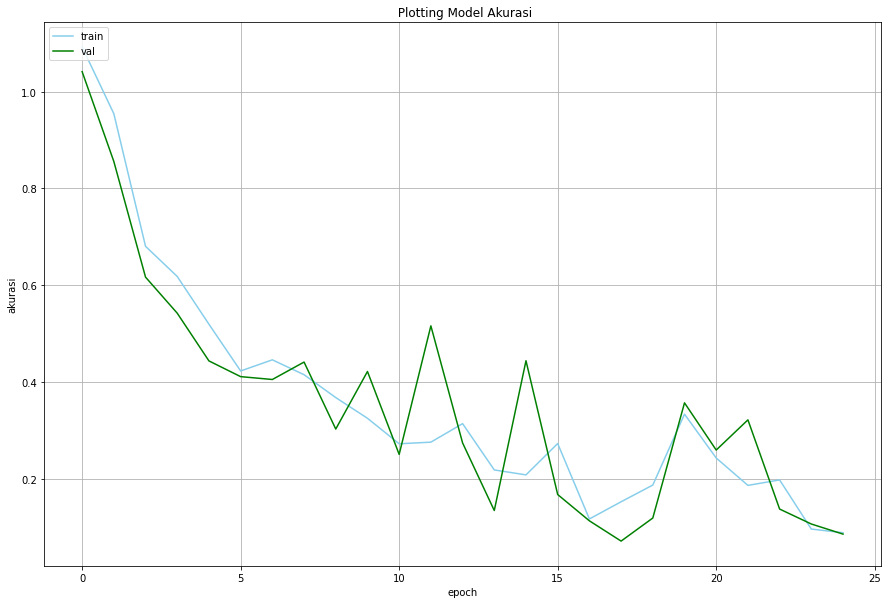

In [ ]:
rcParams['figure.figsize']= 15 , 10
plt.plot(loss, color="skyblue")
plt.plot(validasi_loss, color ="green")
plt.xlabel("epoch")
plt.ylabel("akurasi")
plt.title(" Plotting Model Akurasi")
plt.legend(['train', 'val'], loc='upper left')
plt.grid(True)

plt.show()